Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **19Feb2019**

# 03a. Nuclear Reactor Point Dynamics: Constant Reactivity 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Input Data](#data)
* [Degrees of Freedom](#dof)
* [Steady state](#ss)
* [One-Group Energy Neutron Balance](#nbal)
* [Reactivity Step Change w/o Source](#rhostep)
  - Super-critical
  - Sub-critical
* Pused Source
  - [Critical](#cpulsedq)
  - [Sub-critical](#sbcpulsedq)
  - [Super-Critical Booster](#spcpulsedq)
* [Sudden Insertion of Steady Source, Critical](#qinsert)
* [Sudden Removal of Steady Source, Sub-Critical](#qremove)
* [Frequency Response to Source Fluctuation, Sub-Critical](#freqresp)
* [Interactive Results](#ires)
---

## Objectives<a id="obj"></a>
+ Use one-group energy, point-reactor dynamics modeling to obtain insight on neutron density behavior with constant reactivity.
+ Step change in reactivity.
+ Source impulse response.
+ Step change in steady source.
+ Frequency response to fluctuating source strength.

## Introduction<a id="intro"></a>

In-class course notes OneNote [ChEn-4350-ptreactor](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Etbg-n1j6DRLsyHFvE8CzlABBzBcnHkurPOjZw8MMpWpVQ?e=TCbsFq).

A summary of this topic can be found in the textbooks: 

+ *Fundamentals of Nuclear Science and Engineering*, J. K. Shutils and R. E. Faw, CRC, 2017, 3$^\text{rd}$ edition, 638 pp., Chapter 10.

+ *Introduction to Nuclear Engineering*, J. R. Lamarsh and A. J. Baratta, Pearson, 2018, 4$^\text{th}$ edition, 802 pp., Chapter 7.

Extensive background for this topic can be found in the textbook: *Dynamics of Nuclear Reactors*, David L. Hetrick, 1993, ANS, 542 pp. 

A power nuclear reactor is a heat generation device. In most cases, nuclear heat (heat generated by nuclear fission reactions) is then converted in work through a heat-work cycle on the heated fluid passed through the reactor (figure below). A very simplified modeling of all types of nuclear reactors has been developed in the early days of nuclear engineering. The point-reactor model is an introduction to the subject of nuclear reactor dynamics. It disregards space variations of the neutron density (*i.e.* it is a pointwise approach), it considers dynamics for a one-group energy of neutrons, it only applies to conditions when the reactor is near criticality and the nuclear fuel is nearly static. In this model, a pointwise neutron balance 
is performed using the main components of neutron transport, namely prompt fission, delayed fission, scattering, and absorption (figure below); scattering is taking into account in the diffusion limit.


![](images/point-reactor.png)

## Problem Statement<a id="ps"></a>

Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time for a **step change** in neutron reactivity, $\rho$.

## Input Data<a id="data"></a>

Name                        | Parameter          | Value                | Unit             |
----------------------------|--------------------|----------------------|------------------| 
neutron generation time     | $\ell$             | $1\times 10^{-4}$    |  s               | 
delayed neutron fraction    | $\beta$            | $6.5\times 10^{-3}$  |                  |


For thermal fission of $^{235}$U the following six-group delayed neutron precursors data is typically used (*Dynamics of Nuclear Reactors*, David Hetrick, 1993, ANS textbook).


Delayed neutron emitter group No. | Decay cte ($\lambda_i$,1/sec) | Relative yield ($\beta_i/\beta$) |
----------------------------------|-------------------------------|----------------------------------| 
1                                 | 0.0124                        | 0.033                            |
2                                 | 0.0305                        | 0.219                            | 
3                                 | 0.111                         | 0.196                            |  
4                                 | 0.301                         | 0.395                            | 
5                                 | 1.14                          | 0.115                            |
6                                 | 3.01                          | 0.042                            |

In [1]:
'''Parameters dictionary container'''

params = dict()

params['gen_time']          = 1.0e-4  # s
params['beta']              = 6.5e-3  # 
params['species_decay']     = [0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01] # 1/sec
params['species_rel_yield'] = [0.033, 0.219, 0.196, 0.395, 0.115, 0.042] 

## One-Group Energy Neutron Balance<a id="nbal"></a>

The space-invariant neutron balance for the point-reactor model is

\begin{equation*}
\frac{\text{d}n}{\text{d}t}  = \frac{\rho(t)-\beta}{\ell}\, n + \sum\limits_{i=1}^{6} \lambda_i\,c_i + q(t) ,
\end{equation*}

where the first term on the right side of the equation represents the net production of neutrons not account for delayed neutrons, and the second term accounts for the source of delayed neutrons considering 6 groups of delayed neutron emitters resulting from the fission of $^{235}$U nuclei. The last term on the right side is a time-dependent source. Therefore a balance of neutron emitter species is also necessary

\begin{equation*}
\frac{\text{d}c_i}{\text{d}t}  = \frac{\beta_i}{\ell}\, n - \lambda_i\,c_i ,
     \ \ \ \ \ \forall \ \ \ \ \  i=1,\ldots,6.
\end{equation*}

where the first term on the right side of the equation is the source of emitters as a function of the neutron number density $n(t)$, and the second term is the consumption rate of the emitter by radioactive decay obtained as a function of the product of the number concentration of the emmiter, $c_i(t)$, multiplied by its decay constant $\lambda_i$. Here the number concentration of of the $i$th emitter, $c_i$ is considered in terms of delayed neutron number density, hence the units are the same as $n$.

## Degrees of Freedom<a id="dof"></a>
There exists seven equations, the neutron density balance, and six neutron emitting species balance. There exists seven unknown variables, $n(t)$ and $c_i(t)$. Therefore there are as many unknowns as there are equations and the problem is potentially solvable given the initial conditions for the unknowns, and all the values of the parameters in the foregoing table.

## Steady State<a id="ss"></a>

Neutron density and delayed neutron precursor concentrations are related as follows:

\begin{align*}
n_\text{ss}  &= -\frac{q_\text{ss}\,\ell }{\rho_\text{ss} }
\\
c_{i_\text{ss}}  &= \frac{\beta_i}{\lambda_i\,\ell}\, n_\text{ss}   \ \ \ \ \forall \ \ \ \ i=1,\ldots,6 .
\end{align*}

In [2]:
'''Setup function for delayed neutron species concentrations at steady state'''

def setup_initial_conditions(params):
    
    n_species = len(params['species_decay'])
    
    assert len(params['species_rel_yield']) == n_species
    
    import numpy as np
    c_vec_0 = np.zeros(n_species,dtype=np.float64) # initialize conentration vector

    species_decay = params['species_decay'] # retrieve list of decay constants
    lambda_vec    = np.array(species_decay) # create a numpy vector

    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta  # create the beta_i's vector

    gen_time = params['gen_time'] # retrieve neutron generation time

    n_ss = params['n_ss']
    c_vec_ss = beta_vec/lambda_vec/gen_time * n_ss # compute the steady state precursors number density
    
    params['c_vec_ss'] = c_vec_ss
    
    # setup initial condition for variables
    params['n_0']     = n_ss
    params['c_vec_0'] = c_vec_ss
    
    return

## Vector ODE System<a id="vodes"></a>

Refer to course notes OneNote [ChEn-3170-odes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EmY427F-dSBKkpfFOx4ikf8BVAlJXL5iep1g7V7hcTQxJQ?e=98c69b).

A vector notation for the foregoing system of equations greatly improves the generality of the derived computer code. Towards this goal let us define

\begin{equation*}
\frac{d\uvar}{dt} = \fvar( \uvar, t )
\end{equation*}

where $\uvar(t) = (u_1,u_2,u_3,u_4,u_5,u_6,u_7)$ is the state vector and we assign 

\begin{align*}
 u_1(t)&=n(t),\\
 u_2(t)&=c_1(t),\\
 u_3(t)&=c_2(t),\\
 u_4(t)&=c_3(t),\\
 u_5(t)&=c_4(t),\\
 u_6(t)&=c_5(t),\\
 u_7(t)&=c_6(t).
\end{align*}

Also for $\fvar(\uvar,t) = \bigl(f_1(\uvar,t), f_2(\uvar,t), f_3(\uvar,t), f_4(\uvar,t), f_5(\uvar,t), f_6(\uvar,t), f_7(\uvar,t)\bigr)$ we assign 

\begin{align*}
 f_1 & = \frac{\rho(t)-\beta}{\ell}\, u_1 + \sum\limits_{i=2}^{7} \lambda_i\,u_i + q(t), \\
 f_2 & = \frac{\beta_1}{\ell}\, u_1 - \lambda_1\,u_2, \\
 f_3 & = \frac{\beta_2}{\ell}\, u_1 - \lambda_2\,u_3, \\
 f_4 & = \frac{\beta_3}{\ell}\, u_1 - \lambda_3\,u_4, \\
 f_5 & = \frac{\beta_4}{\ell}\, u_1 - \lambda_4\,u_5, \\
 f_6 & = \frac{\beta_5}{\ell}\, u_1 - \lambda_5\,u_6, \\
 f_7 & = \frac{\beta_6}{\ell}\, u_1 - \lambda_6\,u_7 .
\end{align*}

Finally, the initial conditions given are as follows:

\begin{align*}
 u_1(0)&=n_0,\\
 u_2(0)&=c_{1_0},\\
 u_3(0)&=c_{2_0},\\
 u_4(0)&=c_{3_0},\\
 u_5(0)&=c_{4_0},\\
 u_6(0)&=c_{5_0},\\
 u_7(0)&=c_{6_0}
\end{align*}

where $n_0$ and $c_{i_0}$ are initial values for the unknowns given by the problem specification.

In [3]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q = 0.0
    q_0 = params['q_0']
    
    if t <= 1e-5: # small time value
        q = q_0
    else:
        q = 0.0
        
    return q

In [4]:
'''ODE function'''

def f_vec( time, u_vec, params ):  
    
    import numpy as np
    assert np.all(u_vec >= 0.0)
    
    n_dens = u_vec[0]
    
    gen_time = params['gen_time'] 
    beta     = params['beta']
    
    species_decay = params['species_decay']
    lambda_vec    = np.array(species_decay)
    
    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta
    
    assert len(lambda_vec)==len(beta_vec)
    
    reactivity = params['reactivity']
    
    q_source_t = q_source(time, params)
         
    c_vec = u_vec[1:]
    #print('c_vec = ',c_vec)
    
    n_species = len(lambda_vec)
    f_tmp = np.zeros(n_species+1,dtype=np.float64) # vector for f_vec return
    
    # neutron balance
    f_tmp[0] = (reactivity - beta)/gen_time * n_dens + lambda_vec @ c_vec + q_source_t
    #print('a=',(reactivity - beta)/gen_time * n_dens)
    #print('b=',lambda_vec @ c_vec)
    #print('f_tmp[0]',f_tmp[0])
    
    # loop over 6 species balance
    #for i in range(6):
        #f_tmp[i+1] = species_rel_yield[i]*beta/gen_time * n_dens - lambda_vec[i] * u_vec[i+1]
    f_tmp[1:] = beta_vec/gen_time * n_dens - lambda_vec * c_vec
    #print('f_tmp=',f_tmp)
    #print('time=',time)
    #print('')
    
    return f_tmp

In [5]:
'''Create the point-reactor run function'''

def run_point_reactor( f_vec, params ):

    from scipy.integrate import odeint # Load ODE solver package

    import numpy as np
    time_final = params['time_final']
    n_time_stamps = params['n_time_stamps']
    time_stamps = np.linspace(0.0, time_final, num=n_time_stamps) # create the time stamps for solution values
    params['time_stamps'] = time_stamps
    
    max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step

    n_0     = params['n_0']
    c_vec_0 = params['c_vec_0']
       
    # seven-equation point reactor model
    n_species = len(c_vec_0)
    u_vec_0 = np.zeros(n_species+1,dtype=np.float64)
    
    u_vec_0[0]  = n_0
    u_vec_0[1:] = c_vec_0
            
    (u_vec_history, info_dict) = odeint( f_vec, u_vec_0, time_stamps,
                                         args=( params, ),
                                         rtol=1e-4, atol=1e-4, mxstep=max_n_steps_per_time_step,
                                         full_output=True, tfirst=True )

    assert info_dict['message']=='Integration successful.',\
                     'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']
    
    return u_vec_history

In [43]:
'''Plotting function definition'''

def plot_results(u_vec_history):
    
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(12, 6))

    ax2 = ax1.twinx() # duplicate x axes to plot n and c_i's in different y axes
    
    color_ids = np.linspace(0,1,u_vec_history[:,1:].shape[1])
    
    time_stamps = params['time_stamps']
    
    for (j,color_id) in zip( range(u_vec_history[:,1:].shape[1]), color_ids ):
        color=plt.cm.nipy_spectral(color_id)
        
        ax2.plot(time_stamps,u_vec_history[:,j+1]/params['c_vec_0'][j],'-.',color=color,label=r'$c_%i$'%(j+1) )
        
    ax2.set_ylabel(r'$c_i/c_{i_0}$',fontsize=16,color='black')
    ax2.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax2.legend(loc='lower right',fontsize=12)
    #ax2.set_yscale('log') # uncomment to plot y in log scale
    #ax2.grid(True)

    ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',marker='+',color='red',label=r'$n/n_0$' )

    ax1.set_xlabel(r'Time [s]',fontsize=16)
    ax1.set_ylabel(r'$n/n_0$',fontsize=16,color='black')
    ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best',fontsize=12)
    #ax1.set_yscale('log') # uncomment to plot y in log scale
    ax1.grid(True)

    plt.title(r'Point-Reactor Model: $\rho/\beta=$'
              +str(params['reactivity']/params['beta'])
              +r'; $q_0=$'+str(round(params['q_0'],2)),
              fontsize=18)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [7]:
'''Utility function to peak at results table'''

def peek(time,data, head=5, tail=5):  

    import pandas as pd
    
    layout = {'time':time[:head]}
    layout['n'] = data[:head,0]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[:head,j]
    results = pd.DataFrame(layout)
    print(round(results,3))
    print('')
    
    layout = {'time':time[-tail:]}
    layout['n'] = data[-tail:,j]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[-tail:,j]
    results = pd.DataFrame(layout)
    print(round(results,3))
    print('')

## Reactivity Step Change w/o Source<a id="rhostep"></a>

Assuming a critical, steady-state reactor, without source, $q_\text{ss}=0$ , then $n_\text{ss}$ is arbitrary. 
Introducing a step-change in relative reactivity or "dollar" reactivity, $\frac{\rho_0}{\beta}$, parameter, compute the evolution of the reactor from steady state.

In [31]:
'''Setup up initial conditions'''

import numpy as np

params['q_0'] = 0.0 # must set the initial value of the source here

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0.1 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

# setup remaining initial conditions
setup_initial_conditions(params)

In [32]:
'''Evolve the point-reactor'''

time_final    = 100 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

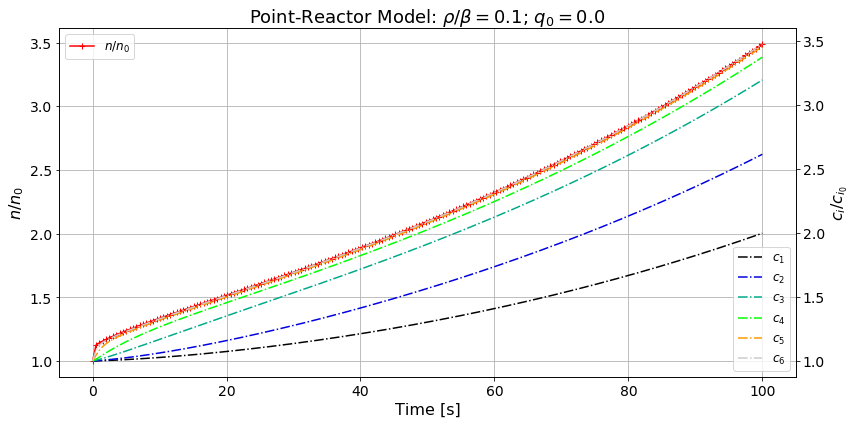

In [33]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [34]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n    c_1     c_2    c_3    c_4    c_5    c_6
0  0.000  0.184  6.231  16.812  4.134  3.073  0.236  0.033
1  0.503  0.207  6.235  16.837  4.156  3.115  0.247  0.035
2  1.005  0.210  6.240  16.871  4.185  3.167  0.256  0.037
3  1.508  0.212  6.246  16.908  4.216  3.218  0.263  0.037
4  2.010  0.215  6.252  16.948  4.248  3.268  0.268  0.038

      time      n     c_1     c_2     c_3     c_4    c_5    c_6
0   97.990  0.111  12.220  43.068  12.944  10.156  0.800  0.111
1   98.492  0.112  12.277  43.289  13.010  10.208  0.804  0.112
2   98.995  0.112  12.334  43.511  13.076  10.260  0.808  0.112
3   99.497  0.113  12.391  43.734  13.143  10.312  0.812  0.113
4  100.000  0.114  12.449  43.958  13.210  10.364  0.816  0.114



In [35]:
'''For the die-hard'''

print(np.round(u_vec_history[:5,:],3))

[[ 0.184  6.231 16.812  4.134  3.073  0.236  0.033]
 [ 0.207  6.235 16.837  4.156  3.115  0.247  0.035]
 [ 0.21   6.24  16.871  4.185  3.167  0.256  0.037]
 [ 0.212  6.246 16.908  4.216  3.218  0.263  0.037]
 [ 0.215  6.252 16.948  4.248  3.268  0.268  0.038]]


## Pulsed Source: Critical Reactor<a id="cpulsedq"></a>

Assuming a critical, steady-state reactor, $\rho_\text{ss}=0$, with no source, $q_\text{ss} = 0$, then, $n_\text{ss}$ is arbitrary.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [51]:
'''Setup up initial conditions'''

import numpy as np

rho_ss = 0.0
rho_0_over_beta = rho_ss # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # set the reactivity

params['n_ss'] = np.random.random() # arbitrary value at steady state

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 10/gen_time # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [52]:
'''Evolve the point-reactor'''

time_final   = 100 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

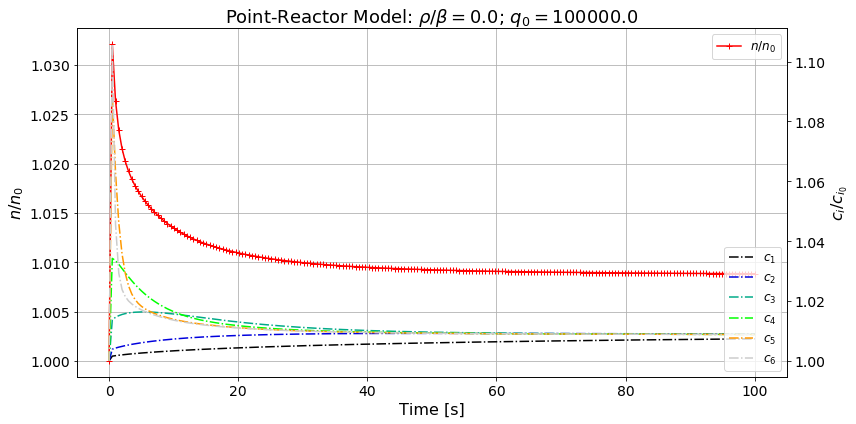

In [53]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [39]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n     c_1     c_2     c_3     c_4    c_5    c_6
0  0.000  0.952  32.301  87.150  21.432  15.928  1.224  0.169
1  0.503  0.957  32.308  87.197  21.473  16.004  1.240  0.172
2  1.005  0.956  32.309  87.202  21.475  16.003  1.236  0.171
3  1.508  0.956  32.310  87.206  21.477  16.001  1.233  0.170
4  2.010  0.955  32.310  87.210  21.479  15.998  1.231  0.170

      time     n     c_1     c_2     c_3     c_4    c_5   c_6
0   97.990  0.17  32.334  87.262  21.459  15.948  1.226  0.17
1   98.492  0.17  32.334  87.262  21.459  15.948  1.226  0.17
2   98.995  0.17  32.334  87.262  21.459  15.948  1.226  0.17
3   99.497  0.17  32.335  87.262  21.459  15.948  1.226  0.17
4  100.000  0.17  32.335  87.262  21.459  15.948  1.226  0.17



## Pulsed Source: Sub-Critical Reactor <a id="sbcpulsedq"></a>

Assuming a sub-critical, steady-state reactor, $\rho_\text{ss}\lt 0$, then some corresponding source $q_\text{ss}$, produces $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [54]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1 # $

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta # set the reactivity
params['reactivity'] = rho_ss

n_ss = np.random.random() # pick an arbitray value for the steady state
params['n_ss'] = n_ss

gen_time = params['gen_time'] # retrieve neutron generation time
q_ss = - n_ss * rho_ss / gen_time

params['q_0'] = 1000 * q_ss # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [55]:
'''Evolve the point-reactor'''

time_final   = 100 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

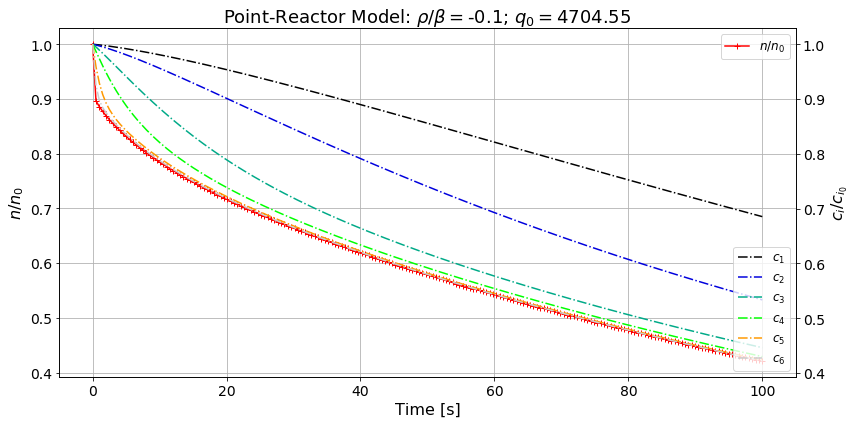

In [56]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [60]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n      c_1      c_2      c_3     c_4    c_5    c_6
0  0.000  0.954  165.020  445.235  109.491  81.372  6.255  0.865
1  0.503  1.084  165.183  446.309  110.430  83.165  6.670  0.962
2  1.005  1.099  165.330  447.270  111.237  84.563  6.885  0.985
3  1.508  1.112  165.491  448.315  112.086  85.931  7.045  1.000
4  2.010  1.124  165.664  449.434  112.968  87.259  7.172  1.012

      time      n      c_1       c_2      c_3      c_4     c_5    c_6
0   97.990  2.984  326.528  1153.121  347.034  272.397  21.457  2.984
1   98.492  3.000  328.057  1159.079  348.819  273.795  21.567  3.000
2   98.995  3.015  329.594  1165.067  350.612  275.201  21.677  3.015
3   99.497  3.031  331.140  1171.085  352.414  276.614  21.789  3.031
4  100.000  3.046  332.694  1177.133  354.225  278.034  21.901  3.046



## Pulsed Source: Super-Critical Booster<a id="spcpulsedq"></a>

Assuming a steady-state reactor with no source, $q_\text{ss}=0$, then $\rho_\text{ss}=0$, and a booster can be applied to put it in super-critical state, $\frac{\rho_0}{\beta} \gt 0$.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [88]:
'''Setup up initial conditions'''

import numpy as np

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0.1 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 0.0001/gen_time # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [89]:
'''Evolve the point-reactor'''

time_final   = 10 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

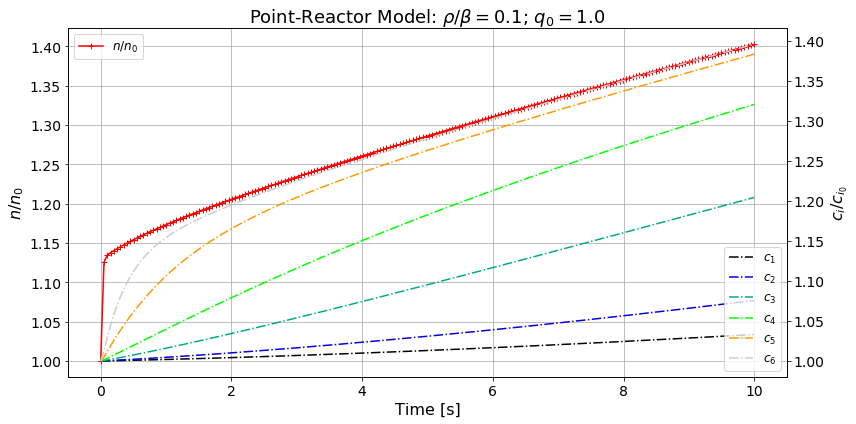

In [90]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [61]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n      c_1      c_2      c_3     c_4    c_5    c_6
0  0.000  0.954  165.020  445.235  109.491  81.372  6.255  0.865
1  0.503  1.084  165.183  446.309  110.430  83.165  6.670  0.962
2  1.005  1.099  165.330  447.270  111.237  84.563  6.885  0.985
3  1.508  1.112  165.491  448.315  112.086  85.931  7.045  1.000
4  2.010  1.124  165.664  449.434  112.968  87.259  7.172  1.012

      time      n      c_1       c_2      c_3      c_4     c_5    c_6
0   97.990  2.984  326.528  1153.121  347.034  272.397  21.457  2.984
1   98.492  3.000  328.057  1159.079  348.819  273.795  21.567  3.000
2   98.995  3.015  329.594  1165.067  350.612  275.201  21.677  3.015
3   99.497  3.031  331.140  1171.085  352.414  276.614  21.789  3.031
4  100.000  3.046  332.694  1177.133  354.225  278.034  21.901  3.046



## Sudden Insertion of Steady Source; Critical<a id="qinsert"></a>

Assuming a steady-state reactor with no source, $q_\text{ss}=0$, then $\rho_\text{ss}=0$, and $n_\text{ss}$ is undetermined. Then, a constant source is inserted at $t = 0$, $q(t)=Q_0$.

In [91]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q_0 = params['q_0']   
        
    return q_0

In [101]:
'''Setup up initial conditions'''

import numpy as np

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_ss = 0
params['reactivity'] = rho_ss 

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1e-4/gen_time   # constant source inserted

# setup remaining initial conditions
setup_initial_conditions(params)

In [102]:
'''Evolve the point-reactor'''

time_final   = 100 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

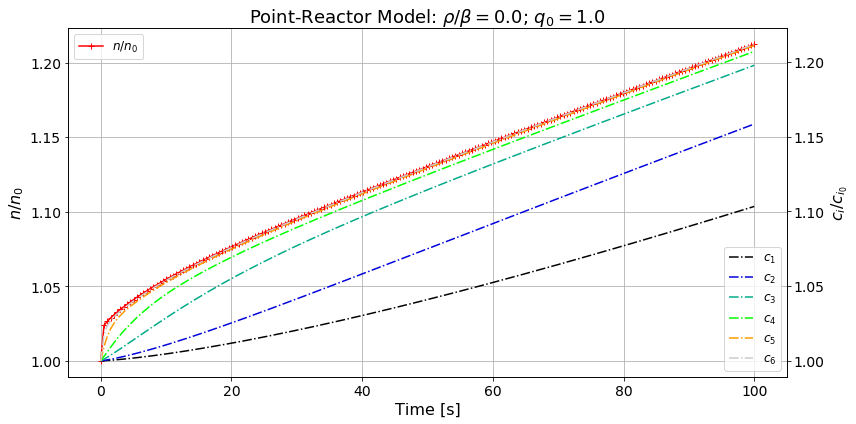

In [103]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [104]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n      c_1      c_2     c_3     c_4    c_5    c_6
0  0.000  0.747  129.201  348.593  85.725  63.710  4.897  0.677
1  0.503  0.765  129.219  348.708  85.826  63.903  4.944  0.689
2  1.005  0.767  129.239  348.840  85.937  64.102  4.978  0.693
3  1.508  0.768  129.261  348.983  86.055  64.295  5.002  0.696
4  2.010  0.770  129.284  349.135  86.175  64.479  5.020  0.697

      time      n      c_1      c_2      c_3     c_4    c_5    c_6
0   97.990  0.819  142.195  402.642  102.386  76.682  5.914  0.819
1   98.492  0.819  142.282  402.930  102.456  76.734  5.918  0.819
2   98.995  0.820  142.370  403.219  102.526  76.786  5.922  0.820
3   99.497  0.820  142.457  403.507  102.596  76.837  5.926  0.820
4  100.000  0.821  142.545  403.795  102.666  76.889  5.930  0.821



## Sudden Removal of Steady Source; Sub-Critical<a id="qremove"></a>

Assuming a steady-state, sub-critical reactor, $\rho_\text{ss}\lt 0$, then $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$ for some $q_\text{ss}$. The source is then removed at $t = 0$, $q(t)=0$. This is referred as a source-jerk method.

In [105]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta
params['reactivity'] = rho_ss 

params['n_ss'] = np.random.random() # pick an arbitray value for the steady state

params['q_0'] = 0.0

# setup remaining initial conditions
setup_initial_conditions(params)

In [106]:
'''Evolve the point-reactor'''

time_final   = 100 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

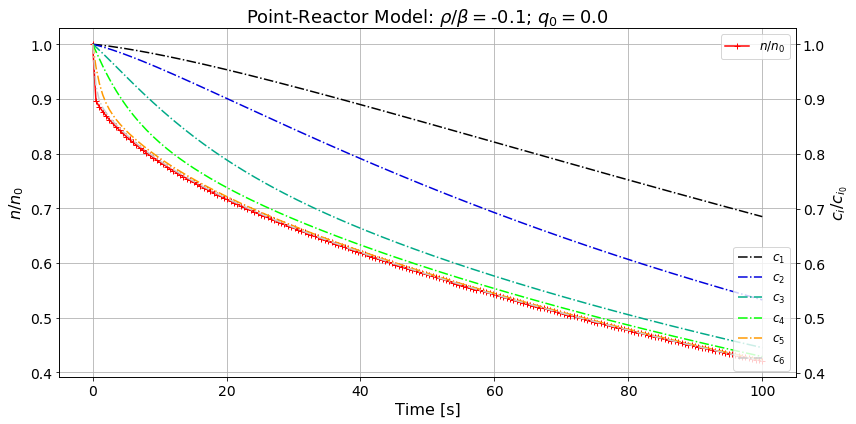

In [107]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [108]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n     c_1     c_2     c_3     c_4    c_5    c_6
0  0.000  0.145  25.030  67.533  16.608  12.342  0.949  0.131
1  0.503  0.130  25.015  67.435  16.522  12.177  0.909  0.121
2  1.005  0.128  24.999  67.325  16.428  12.011  0.881  0.118
3  1.508  0.127  24.980  67.206  16.331  11.852  0.861  0.116
4  2.010  0.126  24.961  67.080  16.231  11.700  0.847  0.115

      time      n     c_1     c_2    c_3    c_4    c_5    c_6
0   97.990  0.056  17.320  36.493  7.504  5.374  0.407  0.056
1   98.492  0.056  17.278  36.375  7.481  5.357  0.405  0.056
2   98.995  0.056  17.237  36.258  7.457  5.340  0.404  0.056
3   99.497  0.056  17.196  36.141  7.434  5.323  0.403  0.056
4  100.000  0.055  17.155  36.024  7.411  5.307  0.402  0.055



## Frequency Response to Source Fluctuation, Sub-Critical<a id="freqresp"></a>

Assuming a steady-state, sub-critical reactor, $\frac{\rho_\text{ss}}{\beta}\lt 0$, with some source $q_\text{ss}$, corresponding to $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$,  apply a fluctuating source at $t = 0$, $q(t)=q_\text{ss} + \,\sin(2\pi\,w\,t)$ for a given cycle frequency $w$.

In [109]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source sinusoidal fluctuation.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. Must have a `'q_0'` key/value pair. Must have a `'source_cycle_freq'`
        key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    import math
    q_0 = params['q_0']
    w   = params['source_cycle_freq']
    
    q = q_0 + math.sin(2*math.pi*w * t) 
        
    return q

In [120]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta
params['reactivity'] = rho_ss 

n_ss = np.random.random()
params['n_ss'] = n_ss # pick an arbitray value for the steady state
gen_time = params['gen_time'] # retrieve neutron generation time
q_ss = - n_ss * rho_ss / gen_time

params['q_0'] = q_ss

params['source_cycle_freq'] = 1/20 # 10-second period 

# setup remaining initial conditions
setup_initial_conditions(params)

In [121]:
'''Evolve the point-reactor'''

time_final   = 100 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

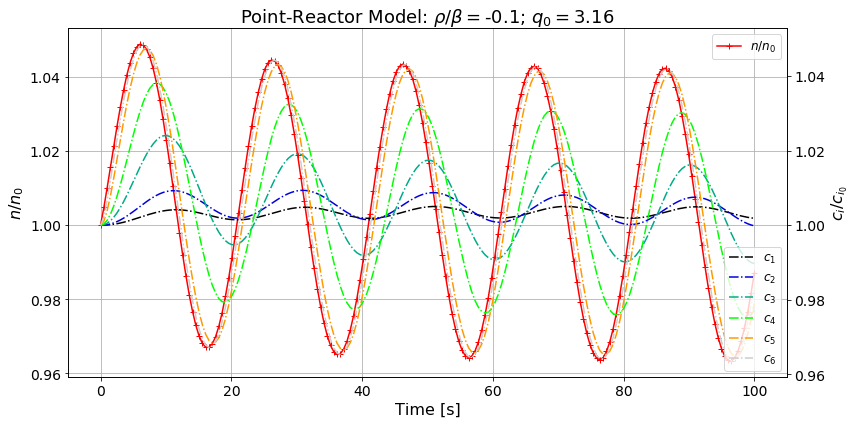

In [122]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [123]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n     c_1      c_2     c_3     c_4    c_5    c_6
0  0.000  0.486  83.993  226.618  55.729  41.417  3.184  0.440
1  0.503  0.488  83.994  226.625  55.736  41.431  3.187  0.441
2  1.005  0.490  83.998  226.651  55.758  41.472  3.196  0.443
3  1.508  0.493  84.004  226.694  55.795  41.539  3.209  0.446
4  2.010  0.496  84.014  226.757  55.847  41.629  3.224  0.448

      time      n     c_1      c_2     c_3     c_4    c_5    c_6
0   97.990  0.426  84.201  226.904  55.326  40.443  3.076  0.426
1   98.492  0.427  84.184  226.797  55.259  40.408  3.082  0.427
2   98.995  0.429  84.170  226.706  55.207  40.401  3.091  0.429
3   99.497  0.431  84.158  226.632  55.172  40.422  3.103  0.431
4  100.000  0.433  84.148  226.577  55.154  40.472  3.117  0.433



## Interactive Results <a id="ires"></a>
Here we can change the parameters interactively and obtain compute the dynamics automatically.

In [124]:
'''Create interactive plots'''

import plotly.offline as py
py.init_notebook_mode()
import plotly.graph_objs as go


layout=go.Layout(title="Point-Reactor Model", 
                 xaxis={'title':'Time [s]'}, 
                 yaxis=dict(side='left',title='HELLO'), 
                 yaxis2=dict(overlaying='y',anchor='x',side='right',title='HELLO')
                )

fig = go.FigureWidget(layout=layout)

scatt = fig.add_scatter()

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'
fig.layout.xaxis.title = 'Time [s]'
fig.layout.yaxis.title = 'n/n_0'
#fig.layout.yaxis2.title = 'T [K]'

In [126]:
'''Vary parameters and display results interactively'''

from ipywidgets import interact
import ipywidgets as widgets
#display(widgets.FloatSlider(readout_format='8.4e'))
@interact(time_final=widgets.FloatSlider(description=r'$t_{max}\,[\text{s}]$',value=100,min=1,max=500,step=10,readout_format='3.0f'),
          rho_over_beta=widgets.FloatSlider(description=r'$\rho/\beta=$',value=0.01,min=-0.1,max=0.1,step=0.01,readout_format='5.3f'), 
          gen_time=widgets.FloatSlider(description=r'$\ell\,[\text{s}]=$',value=1e-4,min=1e-5,max=1e-3,step=1e-4,readout_format='5.3e'),
          select=widgets.Dropdown(description='select:',value='neutron_density',options=['neutron_density', 'c_1','c_6']) 
         )
def update(time_final, rho_over_beta, gen_time, select):
    with fig.batch_update():
        
        n_time_stamps = params['n_time_stamps']
        params['time_final'] = time_final
        time_stamps = np.linspace(0.0, time_final, num=n_time_stamps)
        params['time_stamps'] = time_stamps
        scatt.x=time_stamps
        
        beta = params['beta']
        params['reactivity'] = rho_over_beta * beta
        params['gen_time'] = gen_time
        
        setup_initial_conditions(params)
        
        history = run_point_reactor( f_vec, params )
        
        if select == 'neutron_density':
            scatt.y=history[:,0]/params['n_0']
            scatt.line.color='red'
            fig.layout.yaxis.title = 'n/n_0'
        elif select == 'c_1':
            scatt.y=history[:,1]/params['c_vec_0'][0]
            scatt.line.color='blue'
            fig.layout.yaxis.title = 'c_1/c_1_0'
        elif select == 'c_6':
            scatt.y=history[:,6]/params['c_vec_0'][5]
            scatt.line.color='blue'
            fig.layout.yaxis.title = 'c_6/c_6_0'
        else:
            pass
fig

interactive(children=(FloatSlider(value=100.0, description='$t_{max}\\,[\\text{s}]$', max=500.0, min=1.0, read…

FigureWidget({
    'data': [{'line': {'color': 'red'},
              'type': 'scatter',
              'uid': '…